# Data Cleaning

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df1=pd.read_csv('train.csv')
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
df1.shape

(40000, 17)

In [19]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [21]:
df1.duplicated().sum()

0

In [49]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# EDA

## 1.

In [57]:
# 1. Total Customers
total_customers = len(df)

# 2. Subscription Rate
subscription_rate = (df['y'].value_counts().get('yes', 0) / total_customers) * 100

# 3. Default credit Rate
default_credit_rate = (df['default'].value_counts().get('yes', 0) / total_customers) * 100

# 4. Loan Metrics
housing_loan_rate = (df['housing'].value_counts().get('yes', 0) / total_customers) * 100
personal_loan_rate = (df['loan'].value_counts().get('yes', 0) / total_customers) * 100

# 5. Average Balance
average_balance = df['balance'].mean()

# 6. Duration Metrics
average_duration = df['duration'].mean()
max_duration = df['duration'].max()

# 7. Campaign Efficiency
average_contacts = df['campaign'].mean()
contacted_more_than_once = (df['campaign'] > 1).sum()
percentage_contacted_more_than_once = (contacted_more_than_once / total_customers) * 100

# Display KPIs
print("Key Performance Indicators:")
print(f"Total Customers: {total_customers}")
print(f"Subscription Rate: {subscription_rate:.2f}%")
print(f"Default Rate: {default_credit_rate:.2f}%")
print(f"Housing Loan Rate: {housing_loan_rate:.2f}%")
print(f"Personal Loan Rate: {personal_loan_rate:.2f}%")
print(f"Average Balance: {average_balance:.2f}")
print(f"Average Call Duration: {average_duration:.2f} seconds")
print(f"Max Call Duration: {max_duration} seconds")
print(f"Average Contacts Per Customer: {average_contacts:.2f}")
print(f"Percentage Contacted More Than Once: {percentage_contacted_more_than_once:.2f}%")

Key Performance Indicators:
Total Customers: 40000
Subscription Rate: 7.24%
Default Rate: 2.02%
Housing Loan Rate: 60.08%
Personal Loan Rate: 17.32%
Average Balance: 1274.28
Average Call Duration: 254.82 seconds
Max Call Duration: 4918 seconds
Average Contacts Per Customer: 2.88
Percentage Contacted More Than Once: 63.20%


In [53]:
# 1. Most Used Contact Type
contact_type_distribution = df["contact"].value_counts(normalize=True) * 100
print("Contact Type Distribution (%)")
print(contact_type_distribution)

# 2. Day with Highest Calls
highest_calls_day = df["day"].value_counts().idxmax()
print(f"\nDay with the Highest Calls: {highest_calls_day}")

# 3. Monthly Campaign Analysis
monthly_contacts = df["month"].value_counts()
most_contacts_month = monthly_contacts.idxmax()
least_contacts_month = monthly_contacts.idxmin()
print("\nMonthly Contacts:")
print(monthly_contacts)
print(f"Month with Most Contacts: {most_contacts_month}")
print(f"Month with Least Contacts: {least_contacts_month}")

# 4. Average Call Duration for Successful and Unsuccessful Campaigns
avg_duration_success = df[df["y"] == "yes"]["duration"].mean()
avg_duration_unsuccess = df[df["y"] == "no"]["duration"].mean()
print(f"\nAverage Call Duration (Successful Campaigns): {avg_duration_success:.2f} seconds")
print(f"Average Call Duration (Unsuccessful Campaigns): {avg_duration_unsuccess:.2f} seconds")

# 5. Longest Call Duration by Contact Type
longest_call_duration_by_contact = df.groupby("contact")["duration"].max()
print("\nLongest Call Duration by Contact Type:")
print(longest_call_duration_by_contact)

Contact Type Distribution (%)
contact
cellular     62.2850
unknown      31.9125
telephone     5.8025
Name: proportion, dtype: float64

Day with the Highest Calls: 20

Monthly Contacts:
month
may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: count, dtype: int64
Month with Most Contacts: may
Month with Least Contacts: dec

Average Call Duration (Successful Campaigns): 682.96 seconds
Average Call Duration (Unsuccessful Campaigns): 221.41 seconds

Longest Call Duration by Contact Type:
contact
cellular     3422
telephone    4918
unknown      3881
Name: duration, dtype: int64


In [59]:
# 1. Average Balance by Job
average_balance_by_job = df.groupby("job")["balance"].mean()
print("Average Balance by Job:")
print(average_balance_by_job)

# 2. Loan Status by Marital Status
loan_by_marital_status = df.groupby("marital")["loan"].value_counts(normalize=True).unstack() * 100
print("\nLoan Status by Marital Status (%):")
print(loan_by_marital_status)

# 3. Default Rate by Education Level
default_rate_by_education = df.groupby("education")["default"].value_counts(normalize=True).unstack() * 100
print("\nDefault Rate by Education Level (%):")
print(default_rate_by_education)

# 4. Housing Loan Distribution
housing_loan_distribution = df["housing"].value_counts(normalize=True) * 100
print("\nHousing Loan Distribution (%):")
print(housing_loan_distribution)

# 5. Age Distribution by Loan Status
age_by_loan_status = df.groupby("loan")["age"].describe()
print("\nAge Distribution by Loan Status:")
print(age_by_loan_status)


Average Balance by Job:
job
admin.           1071.794111
blue-collar      1056.803155
entrepreneur     1452.220641
housemaid        1327.157314
management       1688.052902
retired          1513.709116
self-employed    1513.509194
services          977.701279
student          1288.769084
technician       1193.454320
unemployed       1446.983696
unknown          1677.391489
Name: balance, dtype: float64

Loan Status by Marital Status (%):
loan             no        yes
marital                       
divorced  81.058201  18.941799
married   81.686213  18.313787
single    85.590963  14.409037

Default Rate by Education Level (%):
default           no       yes
education                     
primary    98.006380  1.993620
secondary  97.823084  2.176916
tertiary   98.259861  1.740139
unknown    97.909863  2.090137

Housing Loan Distribution (%):
housing
yes    60.0775
no     39.9225
Name: proportion, dtype: float64

Age Distribution by Loan Status:
        count       mean       std   min  

In [61]:
# 1. Most Common Job for Default Cases
default_job = df[df["default"] == "yes"]["job"].value_counts()
print("Most Common Job for Default Cases:")
print(default_job)

# 2. Relationship Between Housing Loan and Personal Loan
housing_personal_loan = df[(df["housing"] == "yes") & (df["loan"] == "yes")].shape[0]
print(f"\nNumber of individuals with both housing and personal loans: {housing_personal_loan}")

# 3. Age Range for High Balance
average_balance = df["balance"].mean()
high_balance_ages = df[df["balance"] > average_balance]["age"]
print(f"\nAge Range for Individuals with High Balance (>{average_balance}):")
print(high_balance_ages.min(), "-", high_balance_ages.max())

# 4. Education Level vs. Balance
balance_by_education = df.groupby("education")["balance"].mean()
print("\nAverage Balance by Education Level:")
print(balance_by_education)

# 5. Marital Status and Housing Loan
housing_by_marital_status = df.groupby("marital")["housing"].value_counts(normalize=True).unstack() * 100
print("\nHousing Loan by Marital Status (%):")
print(housing_by_marital_status)

# 6. Correlation Between Age and Balance
correlation = df["age"].corr(df["balance"])
print(f"\nCorrelation Between Age and Balance: {correlation:.2f}")

# 7. Default Rate by Marital Status
default_rate_marital = df.groupby("marital")["default"].value_counts(normalize=True).unstack() * 100
print("\nDefault Rate by Marital Status (%):")
print(default_rate_marital)

# 8. Loan Holders by Job Type
loan_by_job = df.groupby("job")["loan"].value_counts(normalize=True).unstack() * 100
print("\nLoan Holders by Job Type (%):")
print(loan_by_job)

Most Common Job for Default Cases:
job
blue-collar      201
management       163
technician       129
services          74
admin.            74
entrepreneur      55
self-employed     33
unemployed        29
retired           25
housemaid         22
unknown            2
student            2
Name: count, dtype: int64

Number of individuals with both housing and personal loans: 4195

Age Range for Individuals with High Balance (>1274.27755):
19 - 95

Average Balance by Education Level:
education
primary      1133.186284
secondary    1097.668032
tertiary     1660.930930
unknown      1443.688439
Name: balance, dtype: float64

Housing Loan by Marital Status (%):
housing          no        yes
marital                       
divorced  40.550265  59.449735
married   39.895842  60.104158
single    39.709799  60.290201

Correlation Between Age and Balance: 0.08

Default Rate by Marital Status (%):
default          no       yes
marital                      
divorced  97.333333  2.666667
married   

# Visualization

/var/folders/n6/h445b28x33d9cftslzr1257w0000gn/T/ipykernel_10372/2376491550.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_job.index, y=default_job.values, palette="viridis")


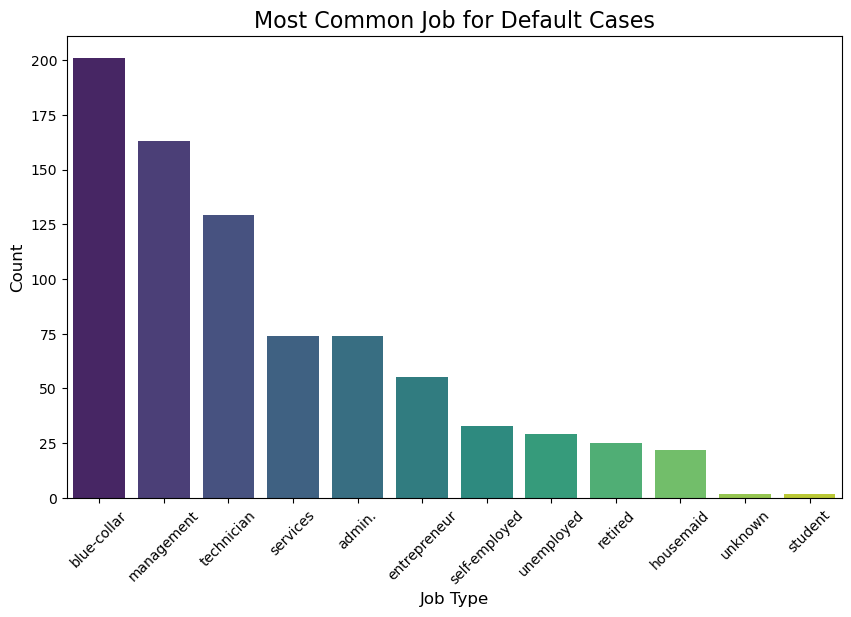

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Most Common Job for Default Cases
# - A bar chart showing job distribution for individuals with default = "yes".
# - Helps identify which job categories are more prone to defaults.

plt.figure(figsize=(10, 6))
default_job = df[df["default"] == "yes"]["job"].value_counts()
sns.barplot(x=default_job.index, y=default_job.values, palette="viridis")
plt.title("Most Common Job for Default Cases", fontsize=16)
plt.xlabel("Job Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

/var/folders/n6/h445b28x33d9cftslzr1257w0000gn/T/ipykernel_10372/3014700328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="label", y="count", data=loan_data, palette="muted")


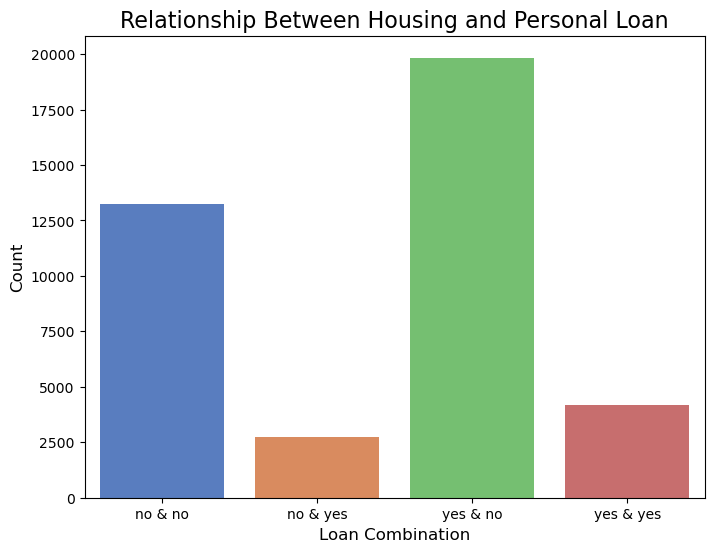

In [86]:
# 2. Relationship Between Housing Loan and Personal Loan
# - A bar chart showing the combinations of housing and personal loans.
# - Useful for understanding overlap between loan types.

loan_data = df.groupby(["housing", "loan"]).size().reset_index(name="count")
loan_data["label"] = loan_data["housing"] + " & " + loan_data["loan"]
plt.figure(figsize=(8, 6))
sns.barplot(x="label", y="count", data=loan_data, palette="muted")
plt.title("Relationship Between Housing and Personal Loan", fontsize=16)
plt.xlabel("Loan Combination", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

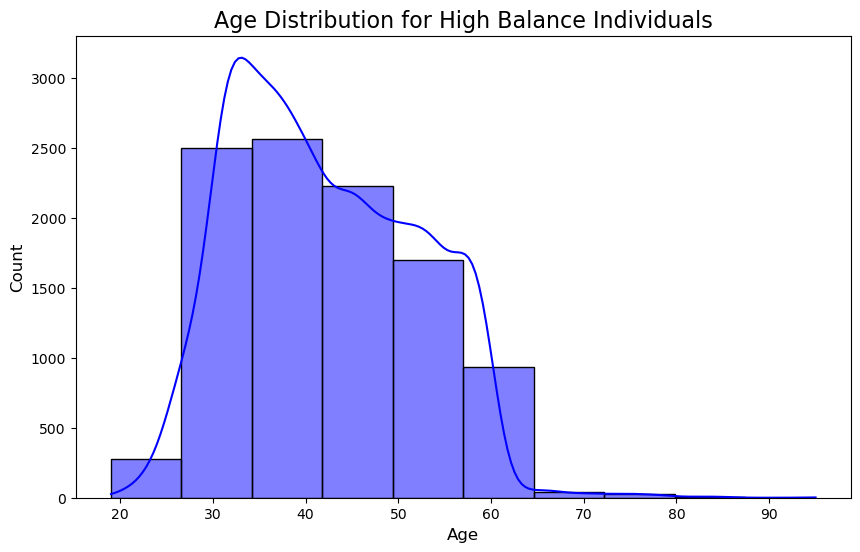

In [74]:
# 3. Age Range for High Balance
# A histogram showing the age distribution for individuals with balances above the average.
# Identifies key age groups with high balances.
high_balance_ages = df[df["balance"] > average_balance]["age"]
plt.figure(figsize=(10, 6))
sns.histplot(high_balance_ages, bins=10, kde=True, color="blue")
plt.title("Age Distribution for High Balance Individuals", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

/var/folders/n6/h445b28x33d9cftslzr1257w0000gn/T/ipykernel_10372/3766036950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="education", y="balance", data=balance_by_education, palette="coolwarm")


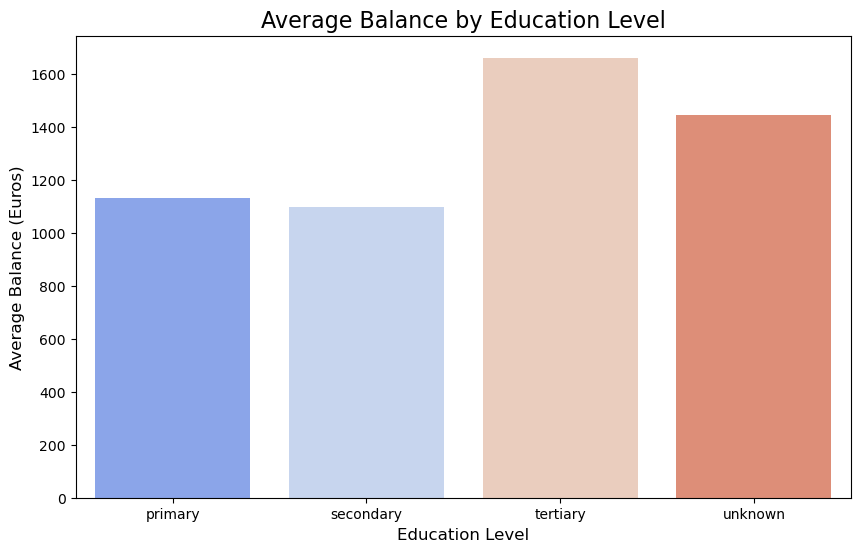

In [76]:
# 4. Education Level vs. Balance
# A bar chart showing average balances for each education level.
# Highlights which education levels correspond to higher financial balances.

plt.figure(figsize=(10, 6))
balance_by_education = df.groupby("education")["balance"].mean().reset_index()
sns.barplot(x="education", y="balance", data=balance_by_education, palette="coolwarm")
plt.title("Average Balance by Education Level", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Average Balance (Euros)", fontsize=12)
plt.show()

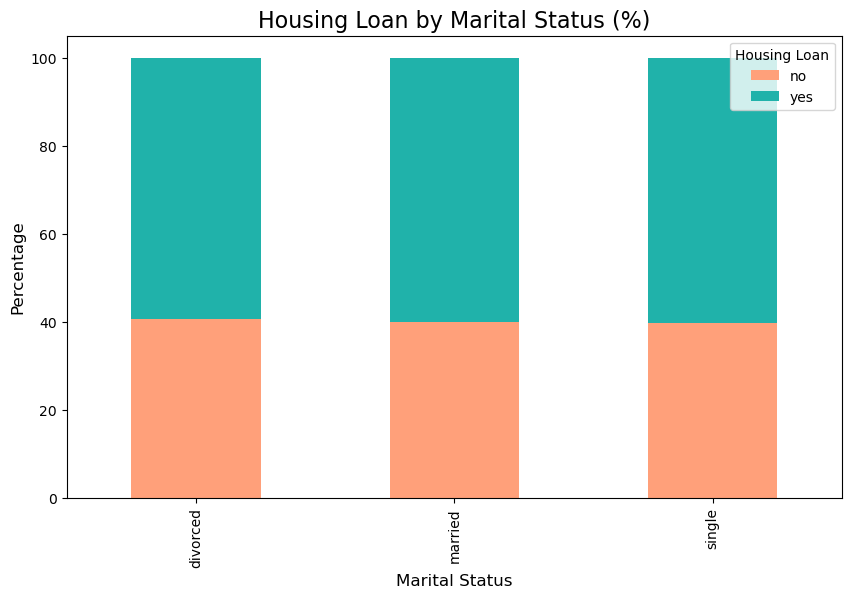

In [78]:
# 5. Marital Status and Housing Loan
# A stacked bar chart showing the percentage of individuals with/without housing loans by marital status.
# Visualizes housing loan trends across marital statuses.

housing_by_marital_status = df.groupby("marital")["housing"].value_counts(normalize=True).unstack() * 100
housing_by_marital_status.plot(kind="bar", stacked=True, figsize=(10, 6), color=["#FFA07A", "#20B2AA"])
plt.title("Housing Loan by Marital Status (%)", fontsize=16)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(title="Housing Loan", loc="upper right")
plt.show()

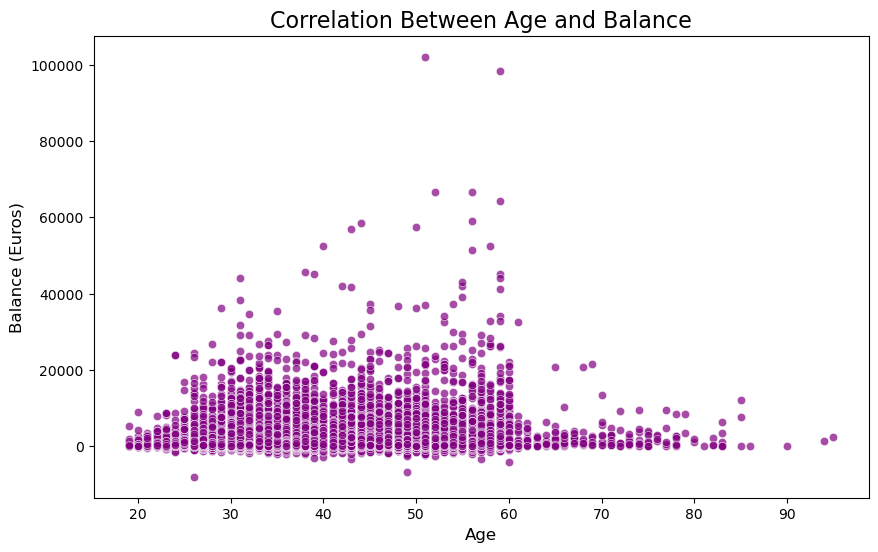

In [80]:
# 6. Correlation Between Age and Balance
# A scatter plot showing the relationship between age and balance.
# Helps identify patterns or trends between these two variables.
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="balance", data=df, alpha=0.7, color="purple")
plt.title("Correlation Between Age and Balance", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Balance (Euros)", fontsize=12)
plt.show()

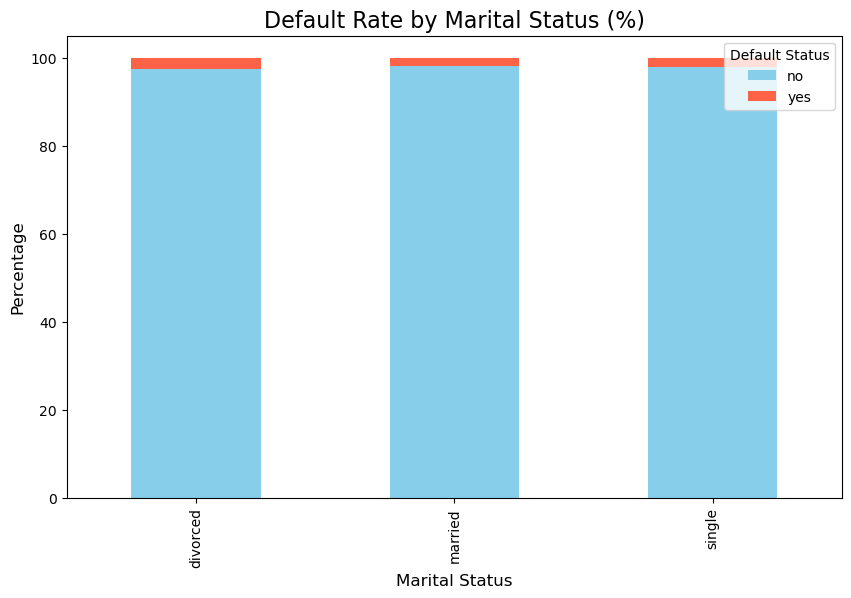

In [82]:

# 7. Default Rate by Marital Status
# A stacked bar chart showing the percentage of defaults (yes and no) for each marital status.
# Helps analyze default risks by marital group.

default_rate_marital = df.groupby("marital")["default"].value_counts(normalize=True).unstack() * 100
default_rate_marital.plot(kind="bar", stacked=True, figsize=(10, 6), color=["#87CEEB", "#FF6347"])
plt.title("Default Rate by Marital Status (%)", fontsize=16)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(title="Default Status", loc="upper right")
plt.show()

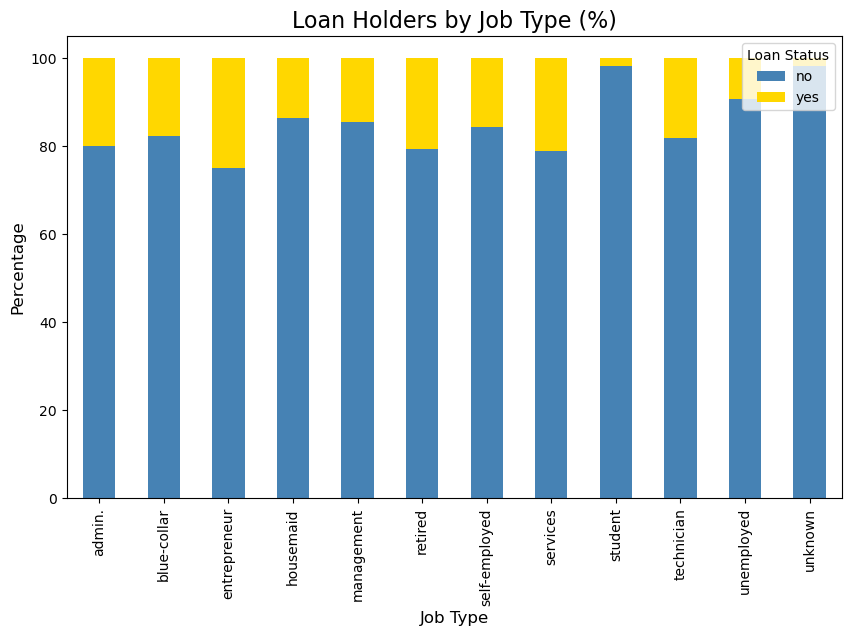

In [84]:
# 8. Loan Holders by Job Type
# A stacked bar chart showing the percentage of individuals with/without loans for each job type.
# Highlights job categories that are more likely to hold personal loans.

loan_by_job = df.groupby("job")["loan"].value_counts(normalize=True).unstack() * 100
loan_by_job.plot(kind="bar", stacked=True, figsize=(10, 6), color=["#4682B4", "#FFD700"])
plt.title("Loan Holders by Job Type (%)", fontsize=16)
plt.xlabel("Job Type", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(title="Loan Status", loc="upper right")
plt.show()


/var/folders/n6/h445b28x33d9cftslzr1257w0000gn/T/ipykernel_10372/758028391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='contact', palette='pastel', order=df['contact'].value_counts().index)


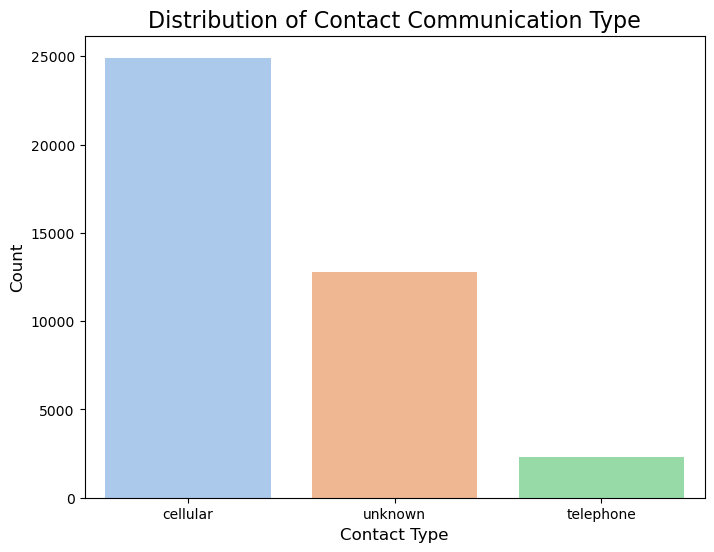

In [94]:
# 9. Contact Communication Type Distribution 
# This visualization shows the distribution of different types of contact communication methods.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='contact', palette='pastel', order=df['contact'].value_counts().index)
plt.title('Distribution of Contact Communication Type', fontsize=16)
plt.xlabel('Contact Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


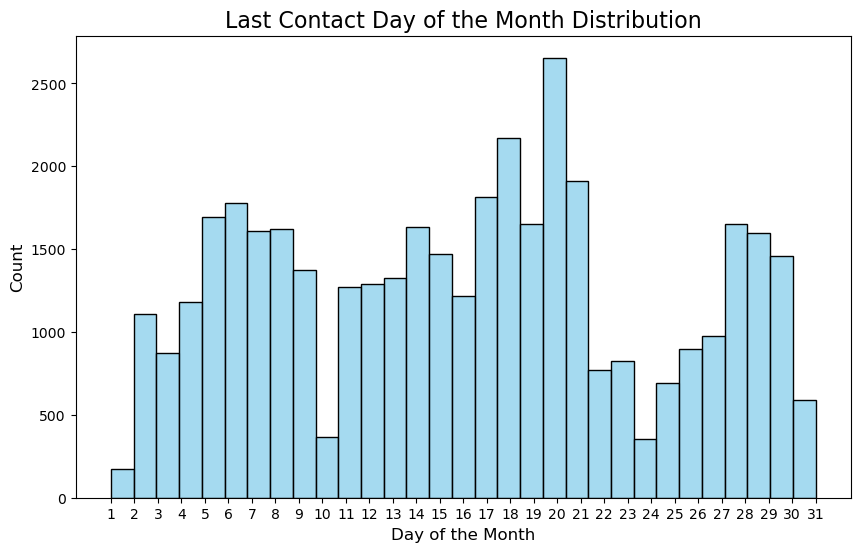

In [96]:
# 10. Day of the Month for Last Contact Distribution
# This visualization shows which days of the month clients are most frequently contacted.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='day', bins=31, kde=False, color='skyblue')
plt.title('Last Contact Day of the Month Distribution', fontsize=16)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(1, 32))
plt.show()



In [ ]:
# 11. Last Contact Month Distribution
# This visualization displays which months were most active for contacting customers.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette='viridis')
plt.title('Last Contact Month Distribution', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


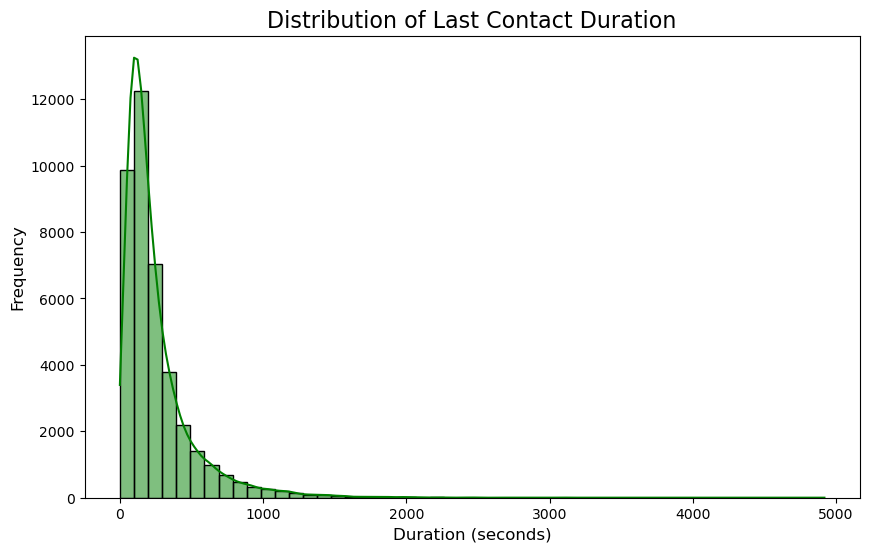

In [98]:
# 12. Contact Duration Distribution
# This visualization helps to understand how long calls typically last.

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration', bins=50, kde=True, color='green')
plt.title('Distribution of Last Contact Duration', fontsize=16)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()



/var/folders/n6/h445b28x33d9cftslzr1257w0000gn/T/ipykernel_10372/1430343333.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration_contact.index, y=avg_duration_contact.values, palette='coolwarm')


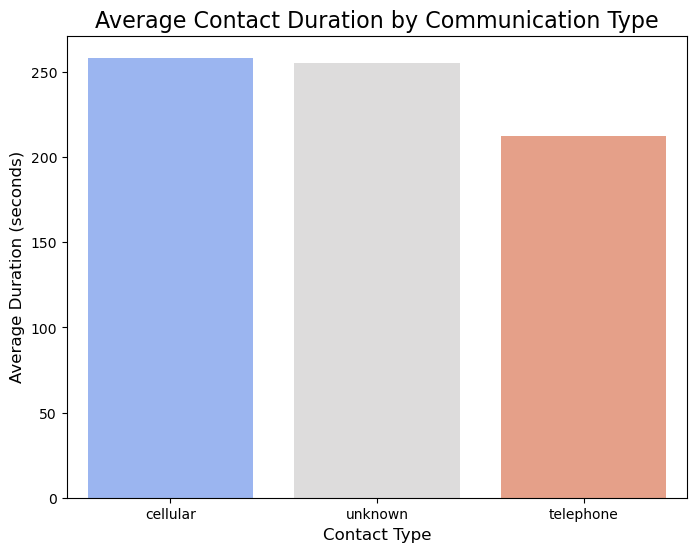

In [100]:
# 13. Average Contact Duration by Communication Type
# This bar chart shows the average call duration for each communication method.

plt.figure(figsize=(8, 6))
avg_duration_contact = df.groupby('contact')['duration'].mean().sort_values(ascending=False)
sns.barplot(x=avg_duration_contact.index, y=avg_duration_contact.values, palette='coolwarm')
plt.title('Average Contact Duration by Communication Type', fontsize=16)
plt.xlabel('Contact Type', fontsize=12)
plt.ylabel('Average Duration (seconds)', fontsize=12)
plt.show()



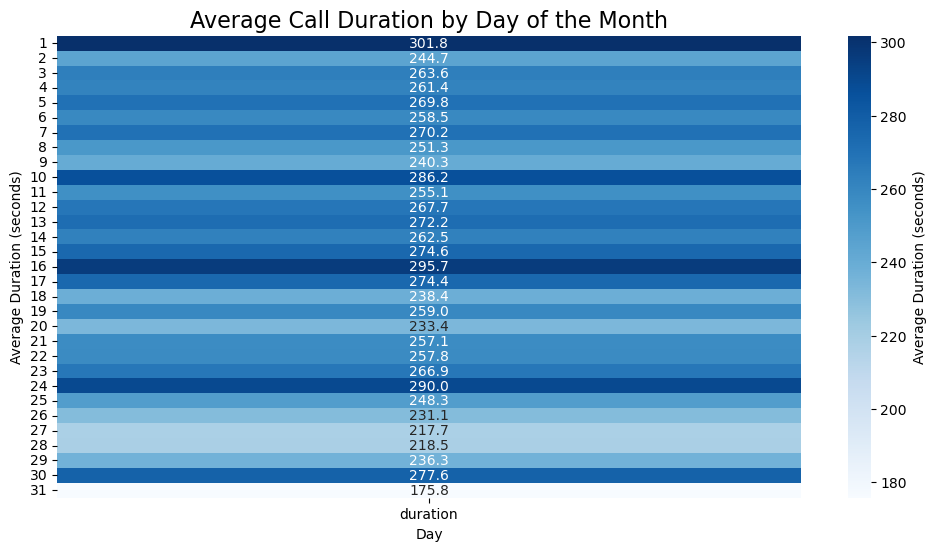

In [102]:
# 14. Contact Day vs. Duration Heatmap
# This heatmap shows the relationship between the day of the month and the average call duration

plt.figure(figsize=(12, 6))
day_duration_avg = df.groupby('day')['duration'].mean().reset_index()
sns.heatmap(day_duration_avg.pivot_table(values='duration', index='day'), cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': 'Average Duration (seconds)'})
plt.title('Average Call Duration by Day of the Month', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Average Duration (seconds)')
plt.show()
